In [3]:
# This is a companion notebook for the book Deep Learning with Python, Second Edition. For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

# If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.

# This notebook was generated for TensorFlow 2.6.

In [4]:
# Introduction to deep learning for computer vision

In [5]:
# Introduction to convnets

In [6]:
# Instantiating a small convnet

from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
# Displaying the model's summary

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385

In [8]:
# Training the convnet on MNIST images

from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 23s 23ms/step - loss: 0.1546 - accuracy: 0.9520
Epoch 2/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0433 - accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0304 - accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0180 - accuracy: 0.9945


In [9]:
# Evaluating the convnet

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0249 - accuracy: 0.9923
Test accuracy: 0.992


In [10]:
# The convolution operation

In [11]:
# Understanding border effects and padding
# Understanding convolution strides

In [12]:
# The max-pooling operation

In [13]:
# An incorrectly structured convnet missing its max-pooling layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model_no_max_pool.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_2 (Flatten)         (None, 61952)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

In [15]:
# Training a convnet from scratch on a small dataset

In [16]:
# The relevance of deep learning for small-data problems

In [21]:
# Copying images to training, validation, and test directories

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [22]:
# Building the model

In [23]:
# Instantiating a small convnet for dogs vs. cats classification

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [24]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [25]:
# Configuring the model for training

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [26]:
# Data preprocessing

In [27]:
# Using image_dataset_from_directory to read images

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [28]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [29]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [30]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [31]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [32]:
# Displaying the shapes of the data and labels yielded by the Dataset

for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [33]:
# Fitting the model using a Dataset

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 56s 869ms/step - loss: 0.7133 - accuracy: 0.5115 - val_loss: 0.6898 - val_accuracy: 0.5680
Epoch 2/30
63/63 [==============================] - 57s 910ms/step - loss: 0.6979 - accuracy: 0.5435 - val_loss: 0.6763 - val_accuracy: 0.5710
Epoch 3/30
63/63 [==============================] - 59s 937ms/step - loss: 0.6668 - accuracy: 0.6070 - val_loss: 0.6632 - val_accuracy: 0.6140
Epoch 4/30
63/63 [==============================] - 53s 838ms/step - loss: 0.6357 - accuracy: 0.6520 - val_loss: 0.6154 - val_accuracy: 0.6470
Epoch 5/30
63/63 [==============================] - 60s 954ms/step - loss: 0.5888 - accuracy: 0.6940 - val_loss: 0.6067 - val_accuracy: 0.6660
Epoch 6/30
63/63 [==============================] - 61s 970ms/step - loss: 0.5613 - accuracy: 0.7190 - val_loss: 0.6130 - val_accuracy: 0.7040
Epoch 7/30
63/63 [==============================] - 57s 905ms/step - loss: 0.5193 - accuracy: 0.7495 - val_loss: 0.6080 - val_accuracy: 0.6850

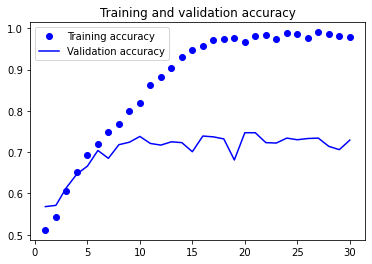

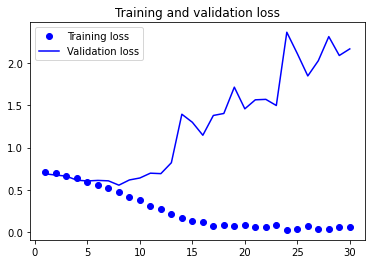

In [34]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [35]:
# Evaluating the model on the test set

test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 12s 186ms/step - loss: 0.6131 - accuracy: 0.7070
Test accuracy: 0.707


In [36]:
# Using data augmentation

In [37]:
# Define a data augmentation stage to add to an image model

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

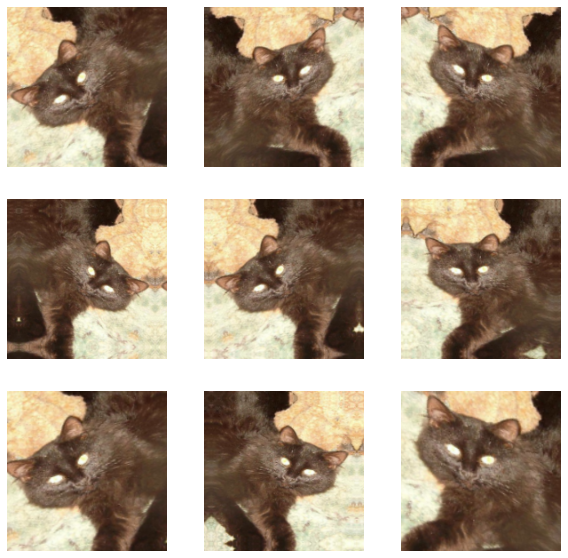

In [38]:
# Displaying some randomly augmented training images

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [39]:
# Defining a new convnet that includes image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [40]:
# Training the regularized convnet

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 61s 903ms/step - loss: 0.7527 - accuracy: 0.5210 - val_loss: 0.7199 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 66s 1s/step - loss: 0.6965 - accuracy: 0.4865 - val_loss: 0.6893 - val_accuracy: 0.5550
Epoch 3/100
63/63 [==============================] - 66s 1s/step - loss: 0.6979 - accuracy: 0.5330 - val_loss: 0.6816 - val_accuracy: 0.5260
Epoch 4/100
63/63 [==============================] - 57s 906ms/step - loss: 0.6744 - accuracy: 0.5970 - val_loss: 0.6816 - val_accuracy: 0.5690
Epoch 5/100
63/63 [==============================] - 67s 1s/step - loss: 0.6556 - accuracy: 0.6240 - val_loss: 0.6902 - val_accuracy: 0.5930
Epoch 6/100
63/63 [==============================] - 59s 933ms/step - loss: 0.6305 - accuracy: 0.6635 - val_loss: 0.6317 - val_accuracy: 0.6610
Epoch 7/100
63/63 [==============================] - 59s 941ms/step - loss: 0.6238 - accuracy: 0.6925 - val_loss: 0.5828 - val_accuracy: 0.6890
E

63/63 [==============================] - 57s 901ms/step - loss: 0.2553 - accuracy: 0.8975 - val_loss: 0.6164 - val_accuracy: 0.8060
Epoch 42/100
63/63 [==============================] - 64s 1s/step - loss: 0.2408 - accuracy: 0.9145 - val_loss: 0.5922 - val_accuracy: 0.8010
Epoch 43/100
63/63 [==============================] - 61s 973ms/step - loss: 0.2201 - accuracy: 0.9150 - val_loss: 0.6228 - val_accuracy: 0.8200
Epoch 44/100
63/63 [==============================] - 58s 924ms/step - loss: 0.2160 - accuracy: 0.9150 - val_loss: 0.6854 - val_accuracy: 0.8130
Epoch 45/100
63/63 [==============================] - 68s 1s/step - loss: 0.2304 - accuracy: 0.9100 - val_loss: 0.7699 - val_accuracy: 0.7800
Epoch 46/100
63/63 [==============================] - 57s 901ms/step - loss: 0.2054 - accuracy: 0.9280 - val_loss: 0.6366 - val_accuracy: 0.8080
Epoch 47/100
63/63 [==============================] - 61s 968ms/step - loss: 0.2029 - accuracy: 0.9140 - val_loss: 0.7570 - val_accuracy: 0.8220
Epoc

63/63 [==============================] - 66s 1s/step - loss: 0.1576 - accuracy: 0.9520 - val_loss: 1.2619 - val_accuracy: 0.8130
Epoch 99/100
63/63 [==============================] - 57s 902ms/step - loss: 0.1491 - accuracy: 0.9570 - val_loss: 1.2721 - val_accuracy: 0.8320
Epoch 100/100
63/63 [==============================] - 64s 1s/step - loss: 0.1204 - accuracy: 0.9585 - val_loss: 1.0459 - val_accuracy: 0.8200


In [41]:
# Evaluating the model on the test set

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 12s 186ms/step - loss: 0.5127 - accuracy: 0.7860
Test accuracy: 0.786


In [42]:
# Leveraging a pretrained model

In [43]:
# Feature extraction with a pretrained model

In [44]:
# Instantiating the VGG16 convolutional base

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 7s 0us/step


In [45]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [46]:
# Fast feature extraction without data augmentation

In [47]:
# Extracting the VGG16 features and corresponding labels

import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 2s 2s/step


In [48]:
train_features.shape

(2000, 5, 5, 512)

In [49]:
# Defining and training the densely connected classifier

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 45ms/step - loss: 16.2948 - accuracy: 0.9250 - val_loss: 7.4486 - val_accuracy: 0.9500
Epoch 2/20
63/63 [==============================] - 3s 42ms/step - loss: 2.5268 - accuracy: 0.9800 - val_loss: 6.1265 - val_accuracy: 0.9670
Epoch 3/20
63/63 [==============================] - 3s 41ms/step - loss: 1.7839 - accuracy: 0.9850 - val_loss: 4.4272 - val_accuracy: 0.9730
Epoch 4/20
63/63 [==============================] - 3s 41ms/step - loss: 1.5258 - accuracy: 0.9860 - val_loss: 5.3885 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 3s 42ms/step - loss: 1.0581 - accuracy: 0.9925 - val_loss: 5.3777 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 3s 41ms/step - loss: 0.2380 - accuracy: 0.9950 - val_loss: 6.2125 - val_accuracy: 0.9720
Epoch 7/20
63/63 [==============================] - 3s 41ms/step - loss: 0.5330 - accuracy: 0.9950 - val_loss: 7.0336 - val_accuracy: 0.9660
Epoch 8/20
6

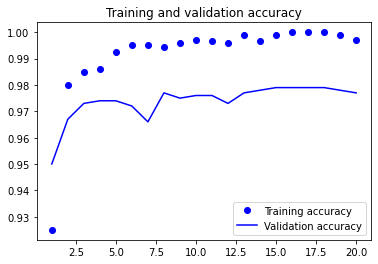

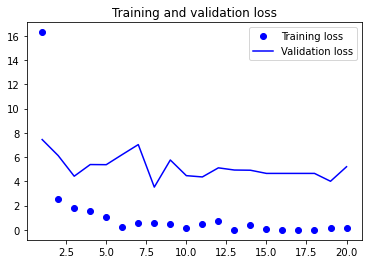

In [50]:
# Plotting the results

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [51]:
# Feature extraction together with data augmentation

In [52]:
# Instantiating and freezing the VGG16 convolutional base

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [53]:
# Printing the list of trainable weights before and after freezing

conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [54]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [55]:
# Adding a data augmentation stage and a classifier to the convolutional base

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [56]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 278s 4s/step - loss: 17.2770 - accuracy: 0.8975 - val_loss: 2.8983 - val_accuracy: 0.9770
Epoch 2/50
63/63 [==============================] - 282s 4s/step - loss: 7.3519 - accuracy: 0.9375 - val_loss: 5.3650 - val_accuracy: 0.9690
Epoch 3/50
63/63 [==============================] - 291s 5s/step - loss: 5.3683 - accuracy: 0.9560 - val_loss: 7.7914 - val_accuracy: 0.9580
Epoch 4/50
63/63 [==============================] - 297s 5s/step - loss: 3.8662 - accuracy: 0.9715 - val_loss: 3.6884 - val_accuracy: 0.9770
Epoch 5/50
63/63 [==============================] - 301s 5s/step - loss: 3.7617 - accuracy: 0.9670 - val_loss: 3.7578 - val_accuracy: 0.9780
Epoch 6/50
63/63 [==============================] - 285s 5s/step - loss: 2.8271 - accuracy: 0.9755 - val_loss: 3.4597 - val_accuracy: 0.9800
Epoch 7/50
63/63 [==============================] - 289s 5s/step - loss: 1.8082 - accuracy: 0.9775 - val_loss: 3.1612 - val_accuracy: 0.9810
Epoch 8/50
6

63/63 [==============================] - 295s 5s/step - loss: 0.5062 - accuracy: 0.9910 - val_loss: 3.4064 - val_accuracy: 0.9820
Epoch 42/50
63/63 [==============================] - 296s 5s/step - loss: 0.4967 - accuracy: 0.9920 - val_loss: 3.4743 - val_accuracy: 0.9820
Epoch 43/50
63/63 [==============================] - 296s 5s/step - loss: 0.7359 - accuracy: 0.9905 - val_loss: 3.0083 - val_accuracy: 0.9840
Epoch 44/50
63/63 [==============================] - 290s 5s/step - loss: 0.1169 - accuracy: 0.9970 - val_loss: 2.6766 - val_accuracy: 0.9840
Epoch 45/50
63/63 [==============================] - 285s 5s/step - loss: 0.4164 - accuracy: 0.9920 - val_loss: 2.4170 - val_accuracy: 0.9830
Epoch 46/50
63/63 [==============================] - 289s 5s/step - loss: 0.2972 - accuracy: 0.9945 - val_loss: 2.3936 - val_accuracy: 0.9840
Epoch 47/50
63/63 [==============================] - 295s 5s/step - loss: 0.5608 - accuracy: 0.9945 - val_loss: 2.5814 - val_accuracy: 0.9840
Epoch 48/50
63/63 

In [57]:
# Evaluating the model on the test set

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 173s 3s/step - loss: 3.4360 - accuracy: 0.9765
Test accuracy: 0.976


In [58]:
# Fine-tuning a pretrained model

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [59]:
# Freezing all layers until the fourth from the last

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [60]:
# Fine-tuning the model

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 318s 5s/step - loss: 2.8423 - accuracy: 0.9745 - val_loss: 2.3736 - val_accuracy: 0.9810
Epoch 2/30
63/63 [==============================] - 319s 5s/step - loss: 2.0499 - accuracy: 0.9760 - val_loss: 2.2530 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 323s 5s/step - loss: 1.2009 - accuracy: 0.9845 - val_loss: 2.6497 - val_accuracy: 0.9760
Epoch 4/30
63/63 [==============================] - 317s 5s/step - loss: 0.9886 - accuracy: 0.9835 - val_loss: 1.9197 - val_accuracy: 0.9810
Epoch 5/30
63/63 [==============================] - 320s 5s/step - loss: 1.1743 - accuracy: 0.9820 - val_loss: 2.1615 - val_accuracy: 0.9830
Epoch 6/30
63/63 [==============================] - 319s 5s/step - loss: 0.6857 - accuracy: 0.9875 - val_loss: 2.0286 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 324s 5s/step - loss: 0.7976 - accuracy: 0.9850 - val_loss: 2.0849 - val_accuracy: 0.9810
Epoch 8/30
63

In [61]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 164s 3s/step - loss: 2.2350 - accuracy: 0.9775
Test accuracy: 0.978


In [62]:
# Summary